<a href="https://colab.research.google.com/github/arad1367/WAC_November-2023/blob/main/Session_8_Nov2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deep Learning with PyTorch
- What is deep learning?
- PyTorch framework
- Introduction to tensors and create tensor
- Convert an array to tensor
- A regression problem with deep learning
- Check some state-of-the-art models

In [35]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim

from sklearn.model_selection import train_test_split

In [3]:
torch.__version__

'2.1.0+cu118'

### What is Deep Learning?

- Deep learning is a machine learning technique that teaches computers to do what comes naturally to humans: learn by example. Deep learning is a key technology behind driverless cars, enabling them to recognize a stop sign, or to distinguish a pedestrian from a lamppost.

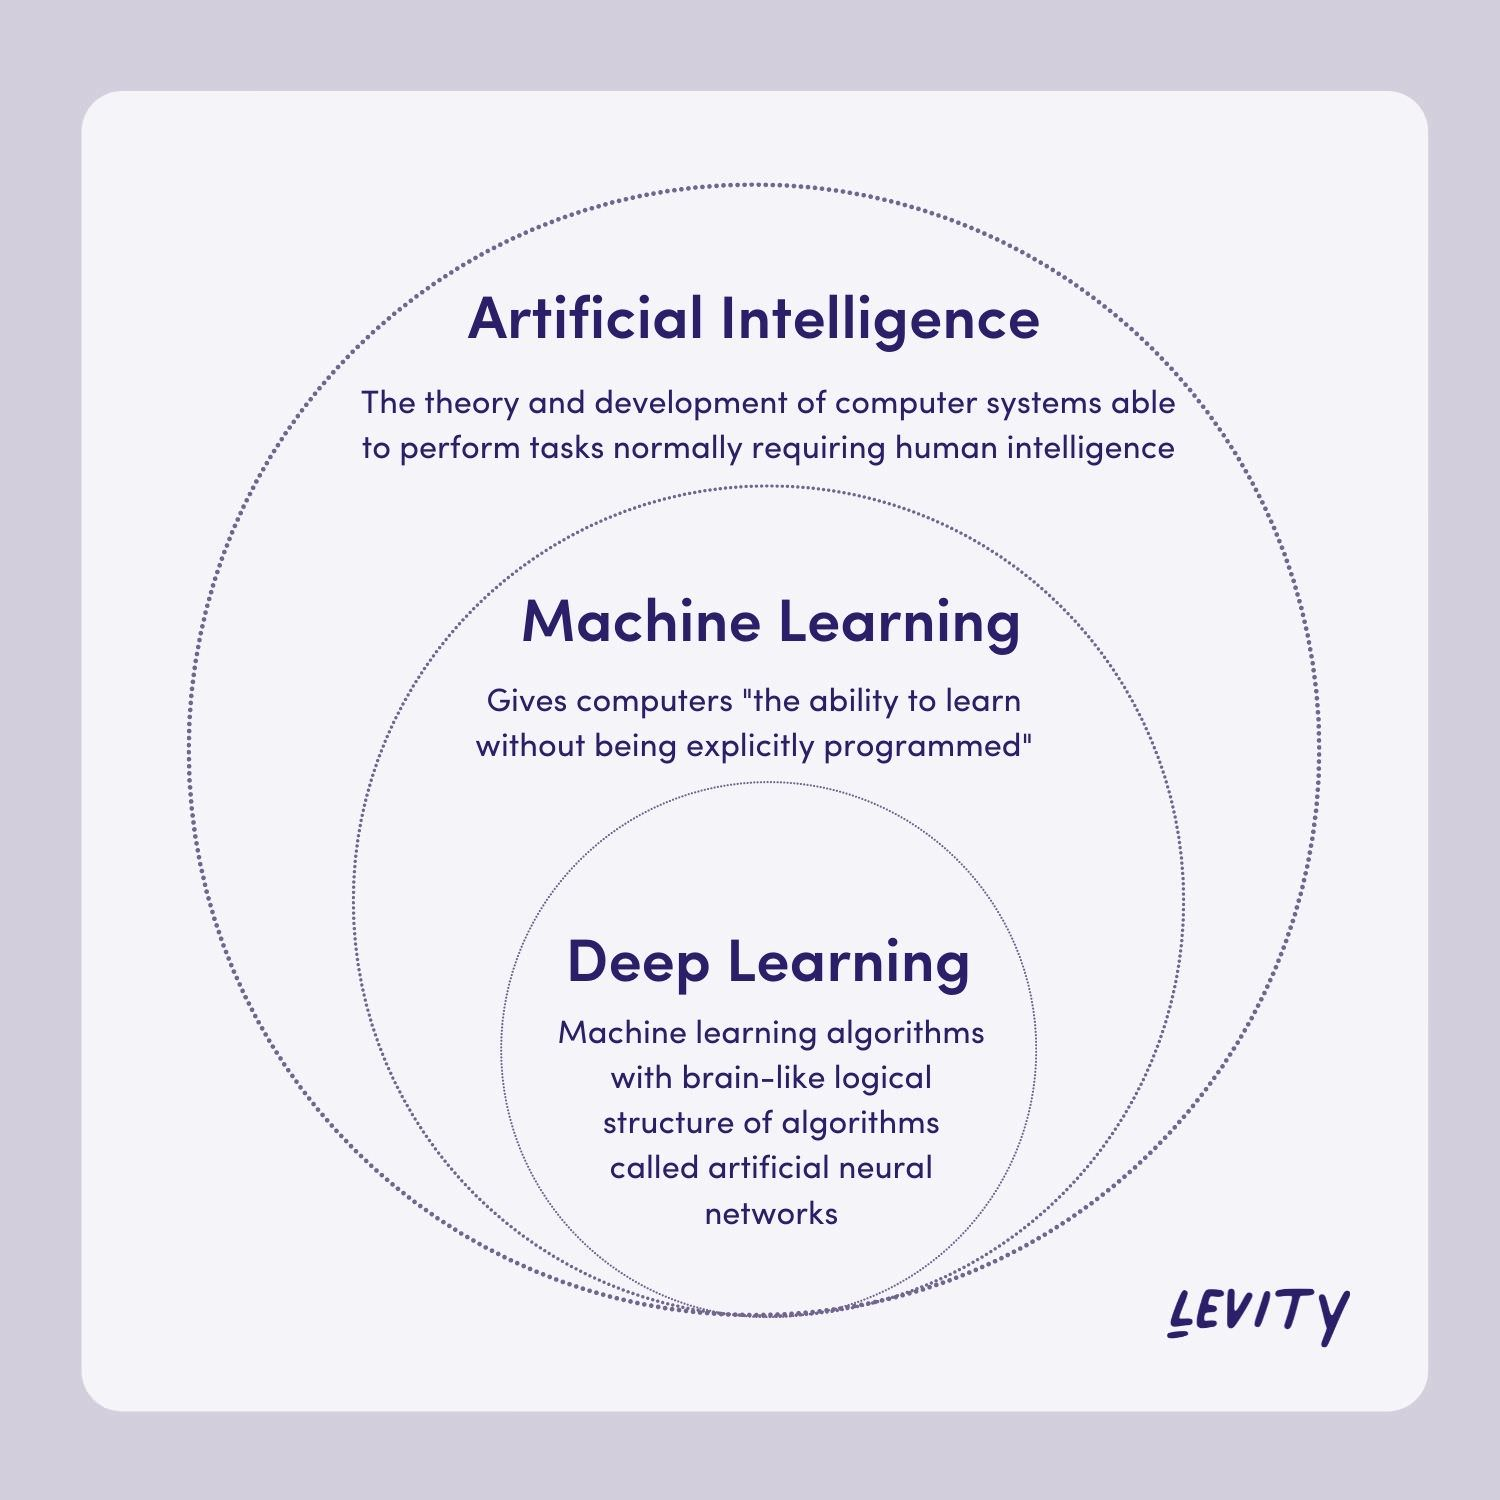

### Introduction to tensors and create tensor

In [14]:
# Create a 2D tensor
tensor_2D = torch.tensor([
    [1, 2],
    [9, 10]
])
tensor_2D, tensor_2D.ndim, tensor_2D.size, type(tensor_2D)

# Create a random tensor
random_tensor = torch.randn(size=(4, 4),
                            dtype=torch.float16)
random_tensor

# Create a zeros tensor/ ones
zeros_tensor = torch.zeros(size=(2, 2))
zeros_tensor
ones_tensor = torch.ones(size=(3, 3))
ones_tensor

# Create a range of tensor(start, end, step)
range_tensor = torch.arange(1, 20, 3)
range_tensor

tensor([ 1,  4,  7, 10, 13, 16, 19])

### Convert an array to tensor

In [15]:
my_array = np.linspace(1, 10, 20)
my_array

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

In [17]:
converted_array_to_tensor = torch.from_numpy(my_array).type(torch.float16)
converted_array_to_tensor

tensor([ 1.0000,  1.4736,  1.9473,  2.4219,  2.8945,  3.3691,  3.8418,  4.3164,
         4.7891,  5.2617,  5.7383,  6.2109,  6.6836,  7.1562,  7.6328,  8.1016,
         8.5781,  9.0547,  9.5234, 10.0000], dtype=torch.float16)

### A regression problem with deep learning

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/arad1367/WAC_November-2023/main/lettuce.csv',
                 encoding='unicode_escape')
df.head()

,Plant_ID,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
0,1,33.4,53,582,6.4,1
1,1,33.5,53,451,6.1,2
2,1,33.4,59,678,6.4,3
3,1,33.4,68,420,6.4,4
4,1,33.4,74,637,6.5,5


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Plant_ID          3169 non-null   int64  
 1   Temperature (°C)  3169 non-null   float64
 2   Humidity (%)      3169 non-null   int64  
 3   TDS Value (ppm)   3169 non-null   int64  
 4   pH Level          3169 non-null   float64
 5   Growth Days       3169 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 148.7 KB


In [20]:
df.describe()

,Plant_ID,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
count,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000
mean,35.441780,28.142222,64.873462,598.045440,6.399211,23.140107
std,20.243433,4.670521,8.988985,115.713047,0.234418,13.075415
min,1.000000,18.000000,50.000000,400.000000,6.000000,1.000000
25%,18.000000,23.600000,57.000000,498.000000,6.200000,12.000000
50%,35.000000,30.200000,65.000000,593.000000,6.400000,23.000000
75%,53.000000,31.500000,73.000000,699.000000,6.600000,34.000000
max,70.000000,33.500000,80.000000,800.000000,6.800000,48.000000


In [21]:
df.isna().sum()

Plant_ID            0
Temperature (°C)    0
Humidity (%)        0
TDS Value (ppm)     0
pH Level            0
Growth Days         0
dtype: int64

In [22]:
df['Plant_ID'].value_counts()

4     48
55    48
11    47
3     47
7     47
      ..
34    45
35    45
2     45
37    45
36    45
Name: Plant_ID, Length: 70, dtype: int64

In [24]:
# Features and target

X = df.drop('Growth Days', axis=1)
y = df['Growth Days']
X[:5]

,Plant_ID,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level
0,1,33.4,53,582,6.4
1,1,33.5,53,451,6.1
2,1,33.4,59,678,6.4
3,1,33.4,68,420,6.4
4,1,33.4,74,637,6.5


In [26]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
len(X_train) == len(y_train)
len(X_test), len(y_test)

(634, 634)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Plant_ID          3169 non-null   int64  
 1   Temperature (°C)  3169 non-null   float64
 2   Humidity (%)      3169 non-null   int64  
 3   TDS Value (ppm)   3169 non-null   int64  
 4   pH Level          3169 non-null   float64
 5   Growth Days       3169 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 148.7 KB


In [28]:
df['Growth Days']

0        1
1        2
2        3
3        4
4        5
        ..
3164    42
3165    43
3166    44
3167    45
3168    46
Name: Growth Days, Length: 3169, dtype: int64

In [29]:
# Turn my pandas data to numpy

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [31]:
# X_train[:10]
y_train[:10]

array([39, 13, 34,  5, 39, 24, 32, 24,  9, 43])

In [32]:
# Turn my numpy arrays to tensors

X_train = torch.from_numpy(X_train).type(torch.float)
X_test = torch.from_numpy(X_test).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.float)
y_test = torch.from_numpy(y_test).type(torch.float)

In [34]:
# X_train[:10]
y_train[:10]

tensor([39., 13., 34.,  5., 39., 24., 32., 24.,  9., 43.])

# Create model

- nn.Sequential
- nn.Module
* link: https://pytorch.org/docs/stable/nn.html

In [37]:
# Solution 1: Create model with nn.Sequential

model_1 = nn.Sequential(
    nn.Linear(in_features=5, out_features=10),
    nn.Linear(in_features=10, out_features=20),
    nn.Linear(in_features=20, out_features=1)
)

model_1.state_dict()
model_1.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=5, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=20, bias=True)
  (2): Linear(in_features=20, out_features=1, bias=True)
)>

In [41]:
# Solution 2: Create model with nn.Module

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=5, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=20)
    self.layer3 = nn.Linear(in_features=20, out_features=1)

  def forward(self, x):
    return self.layer3(self.layer2(self.layer1(x)))

# Define an object for model
LR_model = LinearRegressionModel()
LR_model.state_dict()
LR_model.parameters

<bound method Module.parameters of LinearRegressionModel(
  (layer1): Linear(in_features=5, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=20, bias=True)
  (layer3): Linear(in_features=20, out_features=1, bias=True)
)>

### Check Playground model:
https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,6,8,1&seed=0.25410&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=regression&initZero=false&hideText=false

### Define loss function and optimizer

In [42]:
loss_function = nn.L1Loss()
optimizer = optim.SGD(params=LR_model.parameters(),
                      lr=0.0001)

In [1]:
# Setup device
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"My current device is: {device}")

My current device is: cuda


### Training and testing loop

In [45]:
torch.manual_seed(40) # Random seed to keep ou result

epochs = 200

# Just define some empty list for design a plot after loop
train_loss_values = []
test_loss_values = []
epochs_count = []

# Set data on device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

# Training loop
for epoch in range(epochs):
  # Train mode
  LR_model.train()
  # 5 steps for training loop
  train_pred = LR_model(X_train)
  train_loss = loss_function(train_pred, y_train)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  # Test loop
  # Test mode
  LR_model.eval()
  with torch.inference_mode():
    test_pred = LR_model(X_test)
    test_loss = loss_function(test_pred, y_test)

  if epoch % 10 == 0:
    epochs_count.append(epoch)
    train_loss_values.append(train_loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f"epoch: {epoch} --- Train loss: {train_loss} --- Test loss: {test_loss}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([2535])) that is different to the input size (torch.Size([2535, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([634])) that is different to the input size (torch.Size([634, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


epoch: 0 --- Train loss: 13.973663330078125 --- Test loss: 11.92436695098877
epoch: 10 --- Train loss: 12.009970664978027 --- Test loss: 11.918403625488281
epoch: 20 --- Train loss: 12.004950523376465 --- Test loss: 11.9133882522583
epoch: 30 --- Train loss: 12.000009536743164 --- Test loss: 11.908429145812988
epoch: 40 --- Train loss: 11.99514389038086 --- Test loss: 11.903539657592773
epoch: 50 --- Train loss: 11.990355491638184 --- Test loss: 11.898700714111328
epoch: 60 --- Train loss: 11.985645294189453 --- Test loss: 11.893936157226562
epoch: 70 --- Train loss: 11.981012344360352 --- Test loss: 11.889226913452148
epoch: 80 --- Train loss: 11.97645092010498 --- Test loss: 11.884624481201172
epoch: 90 --- Train loss: 11.971955299377441 --- Test loss: 11.880114555358887
epoch: 100 --- Train loss: 11.96752643585205 --- Test loss: 11.875650405883789
epoch: 110 --- Train loss: 11.96316909790039 --- Test loss: 11.871216773986816
epoch: 120 --- Train loss: 11.95887565612793 --- Test loss

### Loss Curves plot

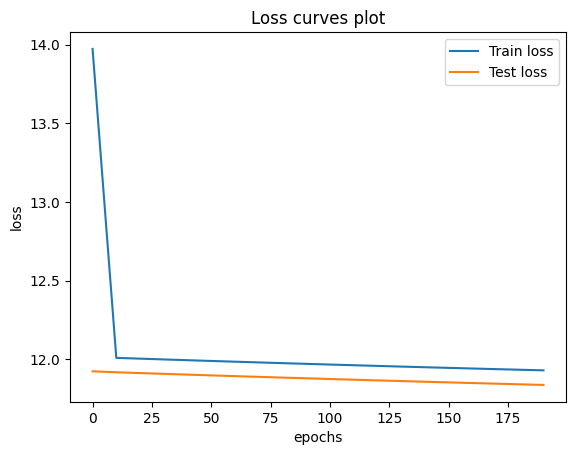

In [46]:
plt.plot(epochs_count, train_loss_values, label='Train loss')
plt.plot(epochs_count, test_loss_values, label='Test loss')
plt.title('Loss curves plot')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

In [47]:
y_test[:10]

tensor([25., 40., 14., 30., 10., 10., 21.,  1.,  6., 10.])

In [49]:
test_pred[:10].squeeze()

tensor([15.5423, 21.3599, 18.7039, 17.6579, 12.5993, 29.0392, 27.1268, 31.4376,
        17.4639, 11.5990])

### See some state-of-the-art model

Huggingface : https://huggingface.co/
Text to image : https://huggingface.co/latent-consistency/lcm-lora-sdv1-5

In [2]:
!pip install --upgrade diffusers transformers accelerate peft

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 15.8 MB/s eta 0:00:00


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'skip_prk_steps': True} were passed to LCMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


  0%|          | 0/4 [00:00<?, ?it/s]

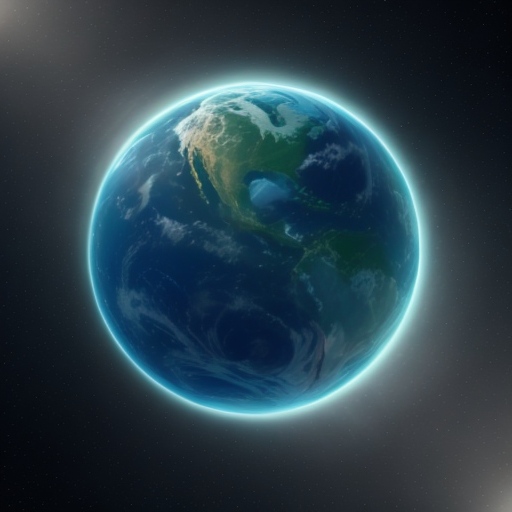

In [4]:
import torch
from diffusers import LCMScheduler, AutoPipelineForText2Image

model_id = "Lykon/dreamshaper-7"
adapter_id = "latent-consistency/lcm-lora-sdv1-5"

pipe = AutoPipelineForText2Image.from_pretrained(model_id, torch_dtype=torch.float16, variant="fp16")
pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda")

# load and fuse lcm lora
pipe.load_lora_weights(adapter_id)
pipe.fuse_lora()


prompt = "Future of earth in the years of 4000"

# disable guidance_scale by passing 0
image = pipe(prompt=prompt, num_inference_steps=4, guidance_scale=0).images[0]
image